<a href="https://colab.research.google.com/github/siddinenibhavana/Mini-Project/blob/main/minorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images


In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',adult_filter_off=True)
downloader.download("ice cream cone",limit=30,output_dir='images',adult_filter_off=True)
downloader.download("rugby ball leather",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/sunflower_garden-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.prettydesigns.com/wp-content/uploads/2014/11/Flower-Tattoo1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.prettydesigns.com/wp-content/uploads/2014/09/Pretty-Floral-Tattoo.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cooldigitalphotography.com/wp-content/uploads/2013/11/Sunflower10.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.prettydesigns.com/wp-content/uploads/2014/09/Peony-Tattoo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i0.wp.com/flowerstemplates.com/wp-content/uploads/2018/02/flower-bouquet-pictures.jpg?fit=807%2C1103
[%] File Downloaded !

[%] Downloading Image #7 from http://cooldigitalphotography.com/wp-content/uploads/2013/11/Sunflower9.jpg
[%] File Downloaded !

[%] Downlo

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = "/content/images"
CATEGORIES = ['pretty sunflower','rugby ball leather','ice cream cone']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array = imread(os.path.join(path,img))
      img_resized = resize(img_array,(150,150,3))
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<BarContainer object of 3 artists>

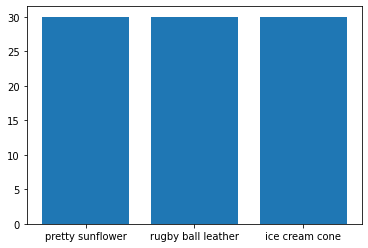

In [ ]:
unique,count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 0, 0, 2])

In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.6666666666666666

In [ ]:
confusion_matrix(y_pred,y_test)

array([[8, 1, 4],
       [0, 6, 0],
       [0, 4, 4]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://scx2.b-cdn.net/gfx/news/hires/2019/sunflowers.jpg
(1280, 1920, 3)
PREDICTED OUTPUT:pretty sunflower


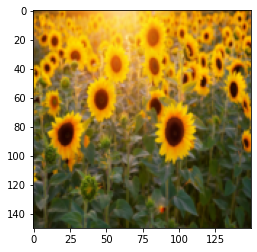

In [ ]:
flat_data =[]
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')